In [1]:
# Check cross-fjord properties in wind-forcing runs
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gsw
import cmocean
import Functions as fun
import os, sys

In [2]:
# Data Paths
path1 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_S/'
path2 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_NS/'

# Maximum zonal wind stress
taum1 = np.array([0, 0.1, 0.3, -0.1, -0.3])
taum2 = taum1

In [3]:
def Qsm_CF(datapath, case_id):
    # Read cell-averaged ice front melt rate (submarine melt) from Iceplume diagnostic
    
    file0 = xr.open_dataset(datapath+'/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    file = file0.isel(T=~file0.get_index("T").duplicated())

    Grid = xr.open_dataset(datapath+'grid.nc')
    grid = Grid.isel(X=slice(200), Xp1=slice(201), Y=slice(35,45))
    area = grid.drF * grid.dyF * grid.HFacC

    diagT = file.T.data
    MR = file.icefrntA.isel(X=1,Y=slice(35, 45)).data # Melt rate at the icefront (m/d)
    Qsm_cf = area.isel(X=1).data * MR / (24*3600) # Submarine melting flux (m^3/s)
    
    return diagT, Qsm_cf

In [4]:
caseid = 3
xid = 1 # Along-fjord index, @ glacier front

# With Sill
diagT1, Qsm1 = Qsm_CF(path1,caseid)
ydist, depth, time, temp1, sal1, den1, u1, v1 = fun.cross_fjord_state(path1,caseid,xid)

# No Sill
diagT2, Qsm2 = Qsm_CF(path2,caseid)
ydist, depth, time, temp2, sal2, den2, u2, v2 = fun.cross_fjord_state(path2,caseid,xid)

In [ ]:
pt = temp2[1,:,5]
s = sal2[1,:,5]
p = gsw.p_from_z(depth, -48.25)

# Save outputs
ds = xr.Dataset(
    data_vars={'ptmp' : pt,
    's' : s,
    'p' : p,})


# ds.to_netcdf('/Users/weiyangbao/Documents/Test_bfrq.nc')
den = den2[1,:,5]
density_gradient = np.gradient(den,depth)
#N2 = -9.8 / den.mean() * density_gradient
N2, Pmid = gsw.Nsquared(s,pt,p, -48.25)
np.diff(p)

# With Sill

Text(0.0, 1.0, '(c)')

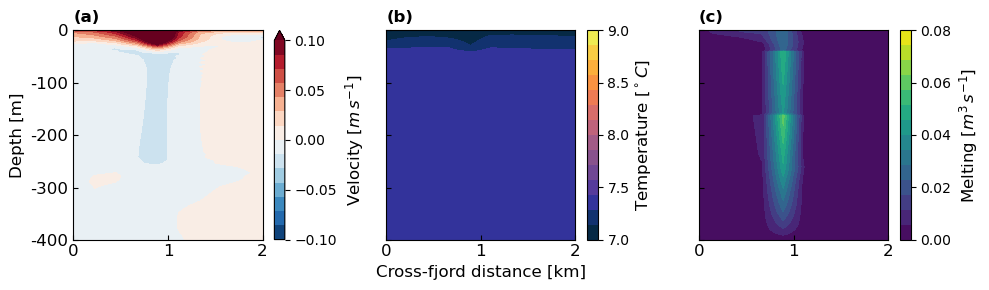

In [5]:
# Along-Fjord Velocity, Temperature, and Submarine Melt
t0 = 3
Tt, Ut, Qsmt = temp1[t0,:,:], u1[t0,:,:], Qsm1[t0,:,:]

fig1, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

# Contour range
cu = np.linspace(-.1,.1,15) 
ct = np.linspace(7,9,15)
cq = np.linspace(0,0.08,15)

# Along-fjord velocity
im1 = ax1.contourf(ydist/1e3, depth, Ut, cu, cmap='RdBu_r',extend='max') 

cbar1 = fig1.colorbar(im1,ax=ax1)
cbar1.set_ticks([-0.1,-0.05,0,0.05,0.1])
cbar1.set_label('Velocity [$m\,s^{-1}$]', size=12)

ax1.tick_params(direction='in', labelsize=12)
#ax1.xaxis.set_visible(False)
ax1.set_xticks([0, 0.9, ydist[-1]/1e3])
ax1.set_xticklabels(["0","1","2"])
ax1.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax1.set_yticklabels(["0","-100","-200","-300","-400"])
ax1.set_ylabel('Depth [m]', size=12)

ax1.set_title(r'(a)', loc='left', size=12, weight='bold')
# ax1.annotate('Glacier', xy=(3,25), xytext=(7,29), 
#             xycoords='data', arrowprops=dict(facecolor='black',width=1), fontsize=12, annotation_clip=False)


# Potential Temperature
im2 = ax2.contourf(ydist/1e3, depth, Tt, ct, cmap=cmocean.cm.thermal) 

cbar2 = fig1.colorbar(im2,ax=ax2)
cbar2.set_ticks([7,7.5,8,8.5,9])
cbar2.set_label('Temperature [$^\circ C$]', size=12)

ax2.tick_params(direction='in', labelsize=12)
#ax2.set_xlim([dist[0],40])
#ax2.set_xticks([X[0], 10, 20, 30, X[-1]])
#ax2.set_yticks([depth[0], -100, -200, -300, depth[-1]])
#ax2.set_yticklabels(["0","-100","-200","-300","-400"])
#ax2.set_ylabel('Depth [$m$]', size=12)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')
ax2.set_xlabel('Cross-fjord distance [km]', size=12)


# Submarine Melting
im3 = ax3.contourf(ydist/1e3, depth, Qsmt, cq, cmap='viridis')

cbar3 = fig1.colorbar(im3,ax=ax3)
cbar3.set_ticks([0,0.02,0.04,0.06,0.08])
cbar3.set_label('Melting [$m^3\,s^{-1}$]', size=12)


#ax3.set_facecolor('grey')
ax3.tick_params(direction='in', labelsize=12)
#ax3.set_yticks([depth[0], -100, -200, -300, depth[-1]])
#ax3.set_yticklabels(["0","-100","-200","-300","-400"])
#ax3.set_ylabel('Depth [$m$]', size=15)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')
#ax3.set_xlim([dist[0],40])
#ax3.set_xticks([X[0], 10, 20, 30, X[-1]])
#ax3.set_xticklabels(["0","10","20","30","40"])


# No Sill

Text(0.0, 1.0, '(c)')

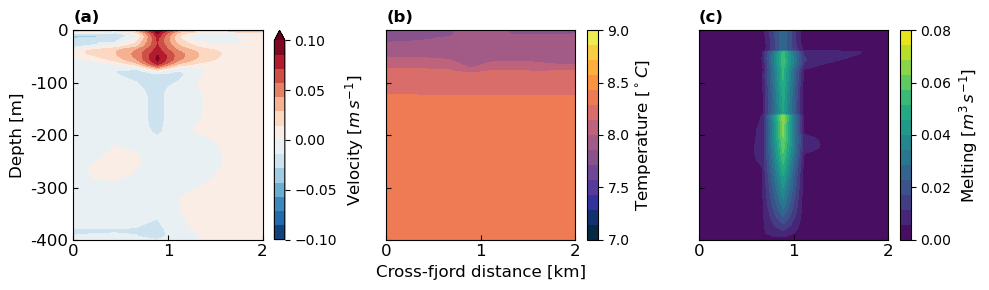

In [10]:
# Along-Fjord Velocity, Temperature, and Submarine Melt
t0 = 6
Tt, Ut, Qsmt = temp2[t0,:,:], u2[t0,:,:], Qsm2[t0,:,:]

fig2, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

# # Contour range
# cu = np.linspace(-.1,.1,20) 
# ct = np.linspace(5,9,20)
# cq = np.linspace(0,0.08,20)

# Along-fjord velocity
im1 = ax1.contourf(ydist/1e3, depth, Ut, cu, cmap='RdBu_r',extend='max') 

cbar1 = fig2.colorbar(im1,ax=ax1)
cbar1.set_ticks([-0.1,-0.05,0,0.05,0.1])
cbar1.set_label('Velocity [$m\,s^{-1}$]', size=12)

ax1.tick_params(direction='in', labelsize=12)
#ax1.xaxis.set_visible(False)
ax1.set_xticks([0, 0.9, ydist[-1]/1e3])
ax1.set_xticklabels(["0","1","2"])
ax1.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax1.set_yticklabels(["0","-100","-200","-300","-400"])
ax1.set_ylabel('Depth [m]', size=12)

ax1.set_title(r'(a)', loc='left', size=12, weight='bold')
# ax1.annotate('Glacier', xy=(3,25), xytext=(7,29), 
#             xycoords='data', arrowprops=dict(facecolor='black',width=1), fontsize=12, annotation_clip=False)


# Potential Temperature
im2 = ax2.contourf(ydist/1e3, depth, Tt, ct, cmap=cmocean.cm.thermal) 

cbar2 = fig2.colorbar(im2,ax=ax2)
cbar2.set_ticks([7,7.5,8,8.5,9])
cbar2.set_label('Temperature [$^\circ C$]', size=12)

ax2.tick_params(direction='in', labelsize=12)
#ax2.set_xlim([dist[0],40])
#ax2.set_xticks([X[0], 10, 20, 30, X[-1]])
#ax2.set_yticks([depth[0], -100, -200, -300, depth[-1]])
#ax2.set_yticklabels(["0","-100","-200","-300","-400"])
#ax2.set_ylabel('Depth [$m$]', size=12)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')
ax2.set_xlabel('Cross-fjord distance [km]', size=12)


# Submarine Melting
im3 = ax3.contourf(ydist/1e3, depth, Qsmt, cq, cmap='viridis')

cbar3 = fig2.colorbar(im3,ax=ax3)
cbar3.set_ticks([0,0.02,0.04,0.06,0.08])
cbar3.set_label('Melting [$m^3\,s^{-1}$]', size=12)


#ax3.set_facecolor('grey')
ax3.tick_params(direction='in', labelsize=12)
#ax3.set_yticks([depth[0], -100, -200, -300, depth[-1]])
#ax3.set_yticklabels(["0","-100","-200","-300","-400"])
#ax3.set_ylabel('Depth [$m$]', size=15)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')
#ax3.set_xlim([dist[0],40])
#ax3.set_xticks([X[0], 10, 20, 30, X[-1]])
#ax3.set_xticklabels(["0","10","20","30","40"])
